<a href="https://colab.research.google.com/github/vishnuatla28/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir(pd)

['BooleanDtype',
 'Categorical',
 'CategoricalDtype',
 'CategoricalIndex',
 'DataFrame',
 'DateOffset',
 'DatetimeIndex',
 'DatetimeTZDtype',
 'ExcelFile',
 'ExcelWriter',
 'Flags',
 'Float32Dtype',
 'Float64Dtype',
 'Float64Index',
 'Grouper',
 'HDFStore',
 'Index',
 'IndexSlice',
 'Int16Dtype',
 'Int32Dtype',
 'Int64Dtype',
 'Int64Index',
 'Int8Dtype',
 'Interval',
 'IntervalDtype',
 'IntervalIndex',
 'MultiIndex',
 'NA',
 'NaT',
 'NamedAgg',
 'Period',
 'PeriodDtype',
 'PeriodIndex',
 'RangeIndex',
 'Series',
 'SparseDtype',
 'StringDtype',
 'Timedelta',
 'TimedeltaIndex',
 'Timestamp',
 'UInt16Dtype',
 'UInt32Dtype',
 'UInt64Dtype',
 'UInt64Index',
 'UInt8Dtype',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__getattr__',
 '__git_version__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_hashtable',
 '_is_numpy_dev',
 '_lib',
 '_libs',
 '_np_version_under1p18',
 '_testing',
 '_tslib',
 '_typing',
 

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#count each value of keys in selected column as now selected sex col
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
 #for Survival column
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

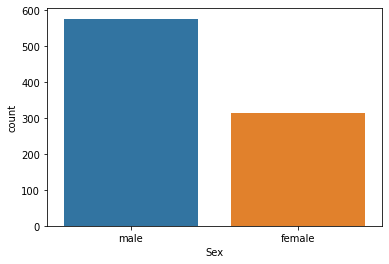

In [10]:
 #seaborn plotting for Sex column 
sns.countplot(x='Sex',data=df)

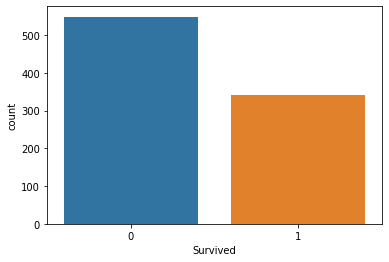

In [11]:
#similary for Survial column
sns.countplot(x='Survived',data=df)


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

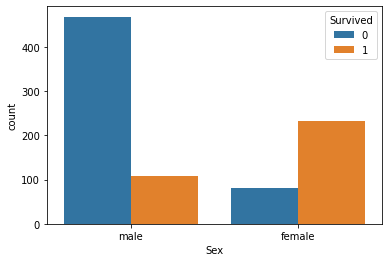

In [12]:
# plot survival with Sex Adding hue parameter
sns.countplot(x='Sex',hue='Survived',data=df)
# value for male and female Survival
df.groupby('Sex')['Survived'].value_counts()

In [13]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

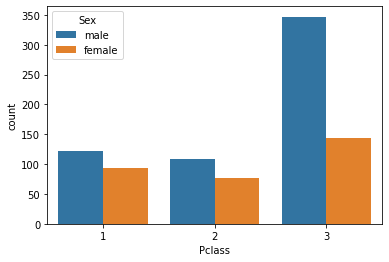

In [14]:
# In which class people where more safe
sns.countplot(x='Pclass',hue='Sex',data=df)


In [15]:
#How many are travelling many are travelling alone
alone=df[(df['Parch']==0)&(df['SibSp']==0)]
alone.shape

(537, 12)

In [16]:
#How many are travelling many are not travelling alone
Not_alone=df[(df['Parch']!=0)|(df['SibSp']!=0)]
Not_alone.shape



(354, 12)

In [17]:
#Male survival rate and female survival rate who are travelling alone?
Alone_Sex_survial=alone.groupby('Sex')['Survived'].value_counts()




In [18]:
# for rates use Normalize
alone.groupby('Sex')['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.785714
        0           0.214286
male    0           0.844282
        1           0.155718
Name: Survived, dtype: float64

In [19]:
# Alternate method
print(Alone_Sex_survial[0]/(Alone_Sex_survial[0]+Alone_Sex_survial[1]),
Alone_Sex_survial[1]/(Alone_Sex_survial[0]+Alone_Sex_survial[1]),
Alone_Sex_survial[2]/(Alone_Sex_survial[2]+Alone_Sex_survial[3]),
Alone_Sex_survial[3]/(Alone_Sex_survial[2]+Alone_Sex_survial[3]))

0.7857142857142857 0.21428571428571427 0.8442822384428224 0.15571776155717762


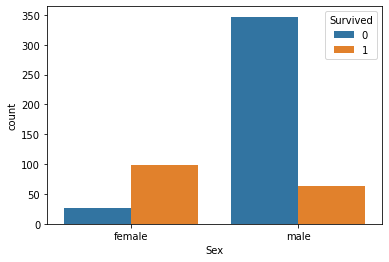

In [20]:
sns.countplot(x='Sex',hue='Survived',data=alone)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

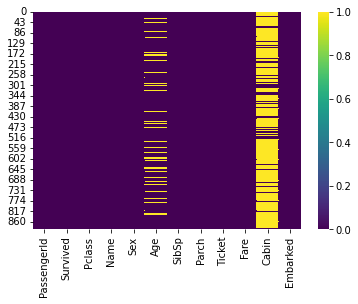

In [21]:
# just for plotting Null vaules
sns.heatmap(df.isnull(),cmap='viridis')
df.isnull().sum()


In [22]:
# more than 50% of cabin data is missing so drop if
df.drop('Cabin',axis=True,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
# So 'S' is most occured in Embarked
df['Embarked'].fillna('S',inplace=True)


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [28]:
df['Age'].mean()
df['Age'].median()

28.0

In [29]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [30]:
df.groupby('Pclass')['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [32]:
def input_data(cols):
 pcl=cols[0]
 Age=cols[1]
 Sex=cols[2]
 if pd.isnull(Age):
   if pcl==1:
     if Sex=='male':
       return 41.28
     else:
       return 34.61
   elif pcl==2:
     if Sex=='male':
       return 30.74
       
     else:
       return 28.72
 
 
   elif pcl==3:
     if Sex=='male':
       return 26.50
     else:
       return 21.75
 
 
   else:
     return Age

In [33]:
df['Age']=df[['Pclass','Age','Sex']].apply(input_data,axis=1)


In [54]:
df['Age'].fillna(df['Age'].mean(), inplace = True)


In [35]:
# So we got no null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
#Categorical Values to Numerical


In [37]:
df['Sex'].replace(to_replace=['male','female'],value=[0,1],inplace=True)


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
LE=LabelEncoder()


In [40]:
df['Embarked']=LE.fit_transform(df['Embarked'])

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,27.779492,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,27.779492,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,27.779492,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,27.779492,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,27.779492,0,0,373450,8.0500,2


In [42]:
#Feature Engineering

In [43]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.030469,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.022638,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.371612,0.083081,0.018443,-0.549500,0.162098
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.171781,0.114631,0.245489,0.182333,-0.108262
Age,0.030469,-0.022638,-0.371612,-0.171781,1.000000,-0.114910,-0.063482,0.116923,0.031713
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.114910,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,0.245489,-0.063482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.182333,0.116923,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.108262,0.031713,0.068230,0.039798,-0.224719,1.000000


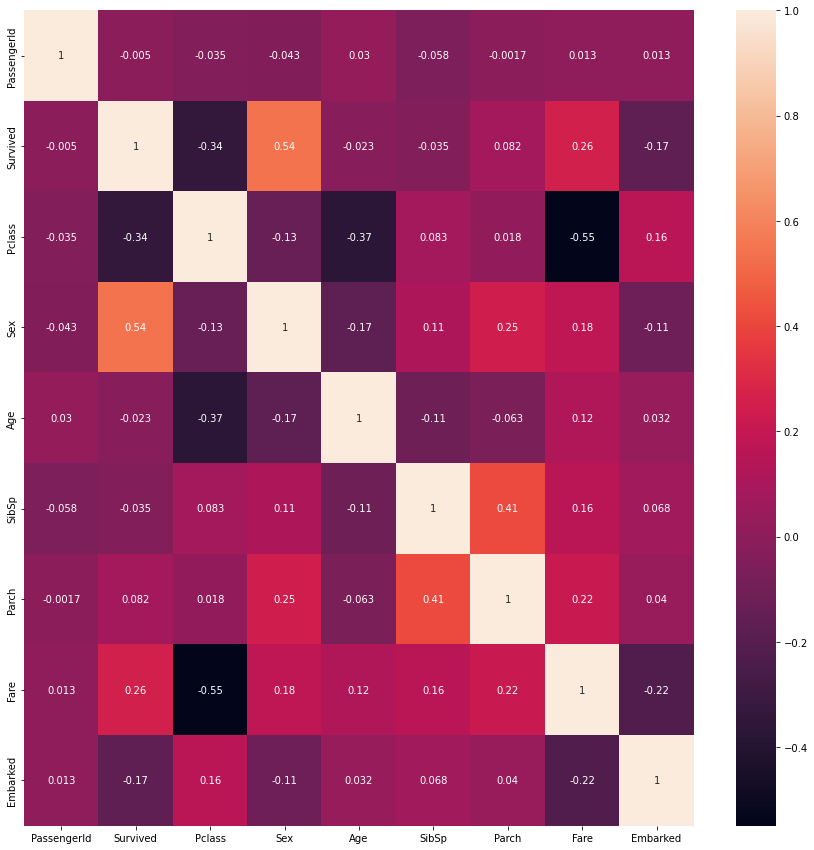

In [44]:
# Using heatmap to plot Correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [45]:
#By the above picture, there is a high correlation between 'Sex' and 'Survived' column

In [46]:
df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)


In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,27.779492,1,0,7.2500,2
1,1,1,1,27.779492,1,0,71.2833,0
2,1,3,1,27.779492,0,0,7.9250,2
3,1,1,1,27.779492,1,0,53.1000,2
4,0,3,0,27.779492,0,0,8.0500,2


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
LGR=LogisticRegression()


In [52]:
LGR.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred=LGR.predict(x_test)


In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred)*100

84.35754189944134